## Geometric Brownian Motion (ShangHai Stock Exchange ticker 600800)

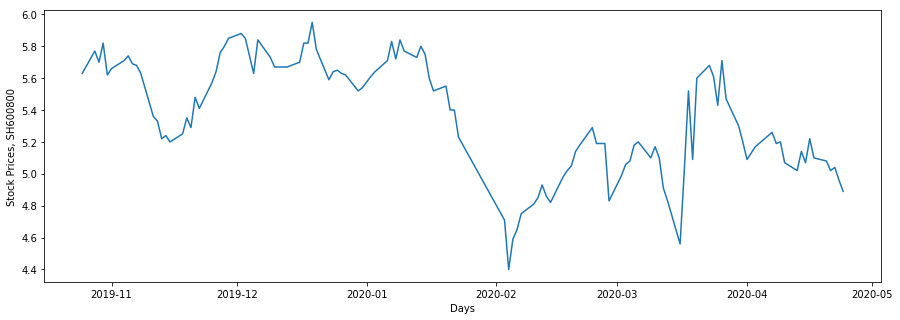

In [57]:
from datetime import date
from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import tushare as ts

pre_start_date =  str(date.today() + relativedelta(months=-6))
pre_end_date = str(date.today())

df = ts.get_hist_data('600800', start=pre_start_date, end=pre_end_date).reset_index(drop = False)[['date', 'close']]
df = df[:: -1]
#type(df['date']) #convert object to datetime[ns64]
df['date']=pd.to_datetime(df['date'])

plt.figure(figsize = (15, 5))
plt.plot(df['date'], df['close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, SH600800')
plt.show()

In [62]:
start_date = str(date.today() + relativedelta(months=-1))
end_date = str(date.today()) # current date
pred_end_date = str(date.today() + relativedelta(months=1))

df = ts.get_hist_data('600800', start=start_date, end=end_date).reset_index(drop = False)[['date', 'close']]
df = df[:: -1].reset_index(drop=True)

print(df.head())
print(df.tail())

         date  close
0  2020-03-25   5.43
1  2020-03-26   5.71
2  2020-03-27   5.47
3  2020-03-30   5.30
4  2020-03-31   5.20
          date  close
17  2020-04-20   5.08
18  2020-04-21   5.02
19  2020-04-22   5.04
20  2020-04-23   4.96
21  2020-04-24   4.89


In [63]:
So = df.loc[df.shape[0] - 1, "close"]
print(So)

4.89


In [64]:
dt = 1

In [65]:
n_of_wkdays = pd.date_range(
            start = pd.to_datetime(end_date, format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
            end = pd.to_datetime(pred_end_date, format = "%Y-%m-%d")).to_series().map(
            lambda x: 1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays

print(T)
print(pd.to_datetime(end_date, format = "%Y-%m-%d") + pd.Timedelta('1 days'))
print(pd.to_datetime(pred_end_date, format = "%Y-%m-%d"))

21
2020-04-26 00:00:00
2020-05-25 00:00:00


In [66]:
N = T / dt
t = np.arange(1, int(N) + 1)
print(t)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [69]:
returns = (df.loc[1:, 'close'] - df.shift(1).loc[1:, 'close']) / df.shift(1).loc[1:, 'close']
print(returns.tolist())
mu = np.mean(returns)
print(mu)

[0.05156537753222841, -0.042031523642732084, -0.031078610603290664, -0.01886792452830182, -0.021153846153846214, 0.007858546168958749, 0.007797270955165699, 0.017408123791102487, -0.013307984790874411, 0.0019267822736030416, -0.024999999999999977, -0.009861932938856155, 0.023904382470119546, -0.01361867704280144, 0.02958579881656794, -0.022988505747126457, -0.003921568627450897, -0.011811023622047341, 0.003984063745020013, -0.015873015873015886, -0.014112903225806508]
-0.004742722430637332


In [70]:
sigma = np.std(returns)
print(sigma)

0.021639762802278154


In [71]:
scen_size = 2
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
print(b)

{'1': array([ 0.89333336,  0.04012892, -1.38266657, -0.64229914,  1.21156755,
        0.68467153, -0.18100093,  1.61475467,  1.22393336, -1.18897763,
        0.40795727, -1.52479589, -0.97950406,  2.26288557,  0.66302859,
        2.03694341,  1.27324769, -0.62376254, -0.88663988, -0.21200148,
        0.46497741]), '2': array([-0.45728929,  1.1067022 , -0.58097585, -0.70873279, -1.98221172,
       -0.45061348, -0.06419097, -1.16520061,  0.62649267,  0.05734663,
        0.78509463,  0.08979685,  0.44637621,  0.96967298, -0.29319965,
        0.65634172, -0.38732794, -1.40968027, -0.33605895,  0.42325009,
       -0.54839476])}


In [72]:
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
print(W)

{'1': array([ 0.89333336,  0.93346228, -0.44920429, -1.09150344,  0.12006411,
        0.80473565,  0.62373472,  2.23848938,  3.46242275,  2.27344512,
        2.68140239,  1.1566065 ,  0.17710244,  2.43998802,  3.1030166 ,
        5.13996001,  6.4132077 ,  5.78944516,  4.90280528,  4.6908038 ,
        5.15578121]), '2': array([-0.45728929,  0.64941291,  0.06843706, -0.64029573, -2.62250745,
       -3.07312093, -3.1373119 , -4.30251251, -3.67601984, -3.61867321,
       -2.83357859, -2.74378174, -2.29740552, -1.32773254, -1.62093219,
       -0.96459047, -1.35191841, -2.76159868, -3.09765764, -2.67440755,
       -3.22280231])}


In [73]:
drift = (mu - 0.5 * sigma**2) * t
print("drift:\n", drift)

diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print("diffusion:\n", diffusion)

drift:
 [-0.00497686 -0.00995372 -0.01493059 -0.01990745 -0.02488431 -0.02986117
 -0.03483803 -0.0398149  -0.04479176 -0.04976862 -0.05474548 -0.05972235
 -0.06469921 -0.06967607 -0.07465293 -0.07962979 -0.08460666 -0.08958352
 -0.09456038 -0.09953724 -0.1045141 ]
diffusion:
 {'1': array([ 0.01933152,  0.0201999 , -0.00972067, -0.02361988,  0.00259816,
        0.01741429,  0.01349747,  0.04844038,  0.07492601,  0.04919681,
        0.05802491,  0.02502869,  0.00383245,  0.05280076,  0.06714854,
        0.11122752,  0.13878029,  0.12528222,  0.10609554,  0.10150788,
        0.11156988]), '2': array([-0.00989563,  0.01405314,  0.00148096, -0.01385585, -0.05675044,
       -0.06650161, -0.06789069, -0.09310535, -0.0795482 , -0.07830723,
       -0.06131797, -0.05937479, -0.04971531, -0.02873182, -0.03507659,
       -0.02087351, -0.02925519, -0.05976034, -0.06703258, -0.05787355,
       -0.06974068])}


In [74]:
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))

print(S)

[[4.89       4.96070051 4.94036138 4.77092899 4.68171727 4.78222611
  4.82951196 4.78675027 4.93236104 5.03959918 4.88720466 4.90606273
  4.72325721 4.60123871 4.80817212 4.85344089 5.0469799  5.16221598
  5.06771997 4.94673354 4.89964593 4.92462476]
 [4.89       4.81781165 4.91008729 4.82467164 4.72765358 4.50666564
  4.44077772 4.41259779 4.28136574 4.31825915 4.30215669 4.35414756
  4.34095848 4.36133318 4.43170514 4.38181396 4.42242859 4.36374422
  4.21162452 4.16035059 4.17778631 4.10800505]]


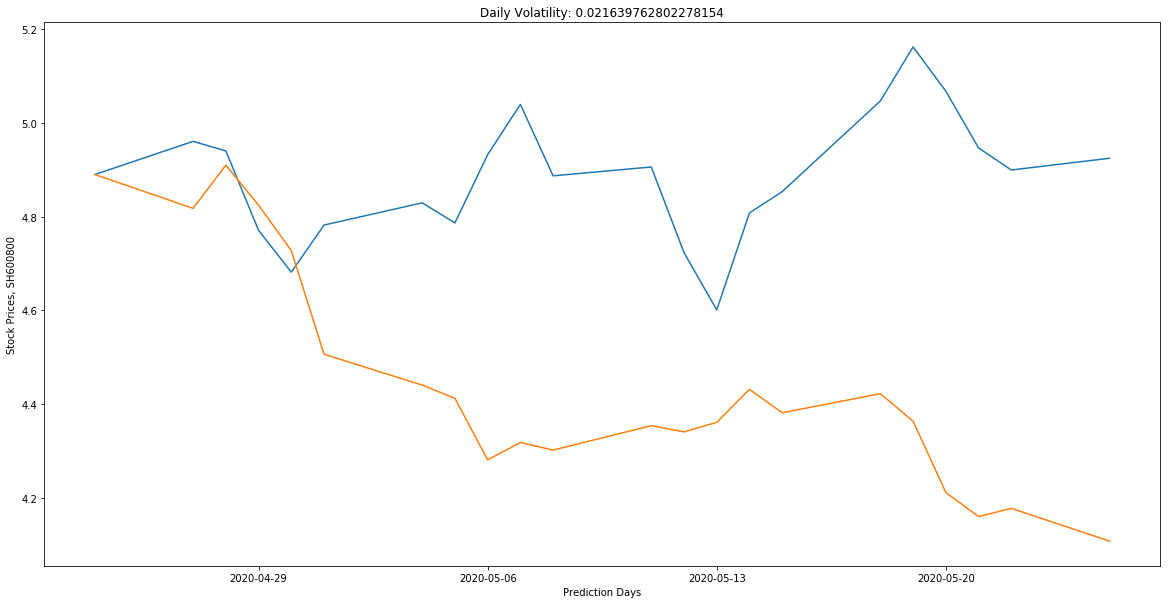

In [76]:
plt.figure(figsize = (20,10))

for i in range(scen_size):
    plt.plot(pd.date_range(start = df["date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])

plt.title("Daily Volatility: " + str(sigma))
plt.ylabel('Stock Prices, SH600800')
plt.xlabel('Prediction Days')

plt.show()